https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/kurmukovai/ds-for-business/88ded3b36c5cc97c26756b4c62c98bbbf99deba3/2022/seminar-5/CC%20GENERAL.csv')
df.dropna(inplace=True)
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Credit Card dataset

- CUST_ID - Identification of Credit Card holder (Categorical)
- BALANCE - Balance amount left in their account to make purchases
- BALANCE_FREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES - Amount of purchases made from account
- ONEOFF_PURCHASES - Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES - Amount of purchase done in installment
- CASH_ADVANCE - Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY - How frequently the cash in advance being paid
- CASH_ADVANCE_TRX - Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX - Numbe of purchase transactions made
- CREDIT_LIMIT - Limit of Credit Card for user
- PAYMENTS - Amount of Payment done by user
- MINIMUM_PAYMENTS - Minimum amount of payments made by user
- PRC_FULL_PAYMENT - Percent of full payment paid by user
- TENURE - Tenure of credit card service for user

# Make customer_id to be an index

In [28]:
df.CUST_ID.nunique(), df.shape

(8636, (8636, 18))

In [29]:
df.index = df['CUST_ID']
df = df.drop('CUST_ID', axis=1)
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Start with basic EDA

In [30]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# 1. Plot features distribution

- Plot a 3 by 6 plot with each subplot representing a  histogramm of features' distribution (e.g. using `plt.subplots(...)`). 
- Add title for each subplot, and format its fontsize.
- Remove last (empty) subplot or make it invisible

save the resulting graph to pdf and upload to the reporting form.

In [31]:
import matplotlib.pyplot as plt

In [32]:
columns = df.columns

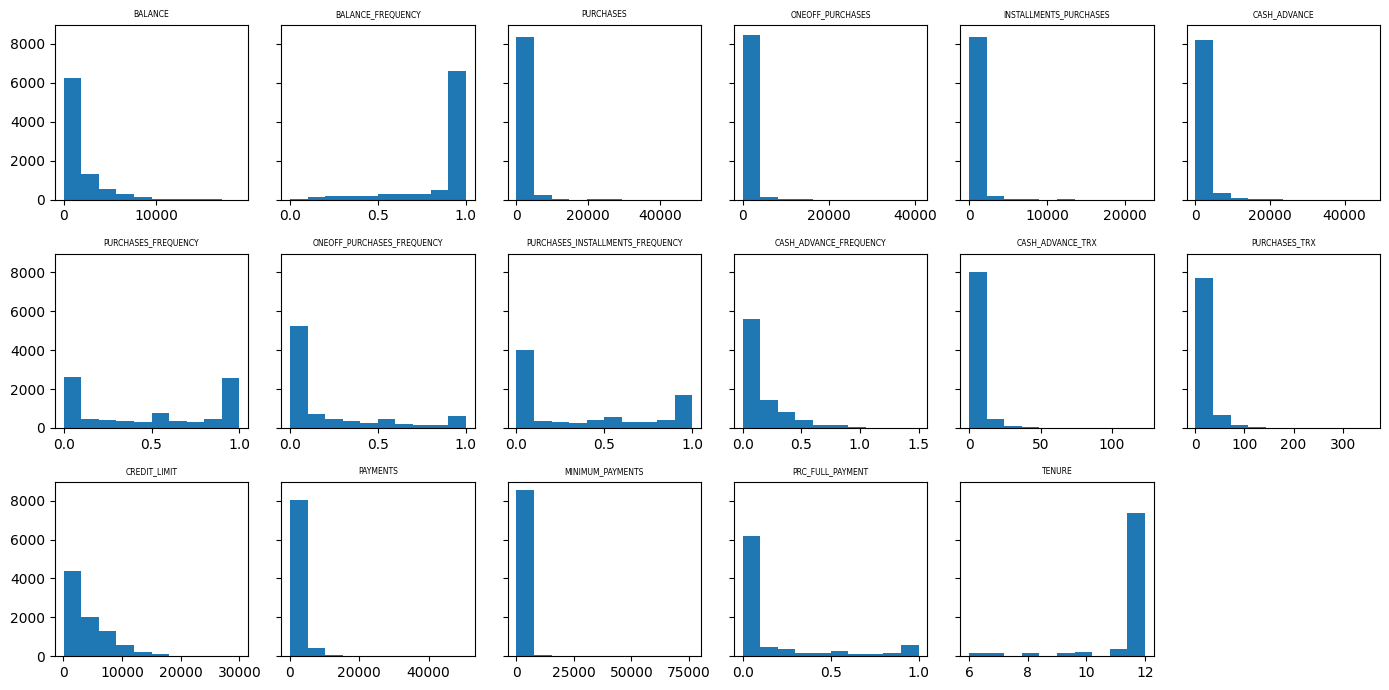

In [33]:
nrows=3
ncols=6
fig, axs = plt.subplots(3, 6, sharey=True, tight_layout=True, figsize=(14,7))
fig.delaxes(axs[2][5])
count = 0 
while count < 17:
    for i in range(3):
        for j in range(6):
            if (j == 5) and i == 2:
                break
            else:
                axs[i,j].hist(df[columns[count]].values)
                axs[i][j].set_title(columns[count],fontsize = 5.5)
                count += 1
plt.savefig("ha3task1.pdf", format="pdf", bbox_inches="tight")

# 2. Preprocess features

All clustering algorithms requires some kind of feature standartization.
We will use standartization (or "z-scoring"):

$$X_{std} = \frac{X - mean(X)}{std(X)}$$

What is the mean of all columns in `X_std`? What is the standard deviation of all columns in `X_std`?


In [41]:
from scipy import stats

In [42]:
X_standardized = df.apply(stats.zscore)

In [43]:
X_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
C10002,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
C10003,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
C10005,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
C10006,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


In [44]:
X_standardized.mean()

BALANCE                             0.000000e+00
BALANCE_FREQUENCY                  -3.422716e-16
PURCHASES                           1.151876e-17
ONEOFF_PURCHASES                   -3.291073e-17
INSTALLMENTS_PURCHASES             -2.797412e-17
CASH_ADVANCE                       -4.278395e-17
PURCHASES_FREQUENCY                 6.582147e-18
ONEOFF_PURCHASES_FREQUENCY         -3.291073e-18
PURCHASES_INSTALLMENTS_FREQUENCY    8.227683e-18
CASH_ADVANCE_FREQUENCY              2.468305e-17
CASH_ADVANCE_TRX                    2.715136e-17
PURCHASES_TRX                      -1.151876e-17
CREDIT_LIMIT                        1.118965e-16
PAYMENTS                           -2.632859e-17
MINIMUM_PAYMENTS                   -4.442949e-17
PRC_FULL_PAYMENT                    5.923932e-17
TENURE                              9.215005e-17
dtype: float64

In [45]:
X_standardized.std()

BALANCE                             1.000058
BALANCE_FREQUENCY                   1.000058
PURCHASES                           1.000058
ONEOFF_PURCHASES                    1.000058
INSTALLMENTS_PURCHASES              1.000058
CASH_ADVANCE                        1.000058
PURCHASES_FREQUENCY                 1.000058
ONEOFF_PURCHASES_FREQUENCY          1.000058
PURCHASES_INSTALLMENTS_FREQUENCY    1.000058
CASH_ADVANCE_FREQUENCY              1.000058
CASH_ADVANCE_TRX                    1.000058
PURCHASES_TRX                       1.000058
CREDIT_LIMIT                        1.000058
PAYMENTS                            1.000058
MINIMUM_PAYMENTS                    1.000058
PRC_FULL_PAYMENT                    1.000058
TENURE                              1.000058
dtype: float64

X_std.mean=0, X_std.std=1

## Scientific notation

Recall that sometimes Python uses a so-called scientific notation for small numbers, e.g. notation `6.993531e-17` by definition is: 

$$6.993531 \cdot 10^{-17} = \frac{6.993531}{10^{17}} = 0.00000000000000006993531$$.

For more details, see https://sparrow.dev/python-scientific-notation/ .

For the purposes of this home assignment all numbers with absolute value smaller than $0.000001$ are effectively $0$.

In [46]:
X_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
C10002,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
C10003,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
C10005,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
C10006,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


# 3. KMeans

What does K in KMeans means?


"K" stands for the number of clusters to look for in the data

# Run KMeans with 5 clusters

In [47]:
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [48]:
kmeans = KMeans(n_clusters=5, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

In [49]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([  86, 3754, 2334, 1107, 1355]))

# 4. Run Kmeans with different number of clusters


Which number of clusters is optimal according to silhouette score?


In [50]:
def run_kmeans(x, kmin=2, kmax=20):
    inertia = []
    for k in tqdm(range(kmin, kmax+1)):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(x)
        results_df[f'clusters_kmeans_{k}'] = kmeans.predict(x)
        inertia.append(kmeans.inertia_)
    return inertia

In [51]:
results_df = pd.DataFrame()
kmin, kmax = 2, 20
n_clusters = range(kmin, kmax+1)

# standardized
inertia = run_kmeans(X_standardized, kmin, kmax)

100%|██████████| 19/19 [00:04<00:00,  4.59it/s]


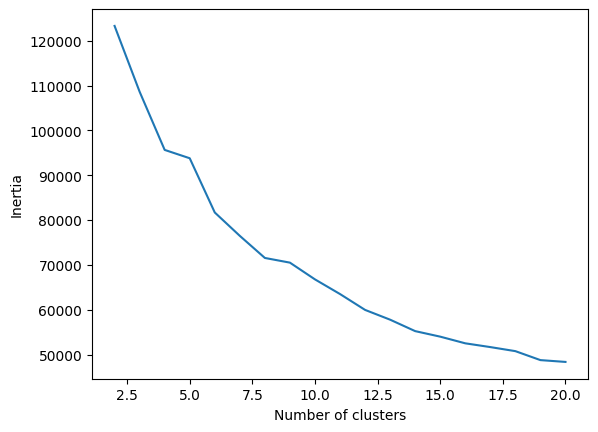

In [52]:
plt.plot(n_clusters, inertia);
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


def plot_silhouette(X, kmin=4, kmax=15, step=2):
  # Adopted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

    range_n_clusters = range(kmin, kmax, step)

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(6, 3)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples


        ax1.set_title(f"The silhouette plot for the various clusters, n_clusters = {n_clusters}")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

For n_clusters = 4 The average silhouette_score is : 0.1970633476945604
For n_clusters = 8 The average silhouette_score is : 0.1892266381391483
For n_clusters = 12 The average silhouette_score is : 0.21771895705090313
For n_clusters = 16 The average silhouette_score is : 0.19986413231372693
For n_clusters = 20 The average silhouette_score is : 0.2037068163716693


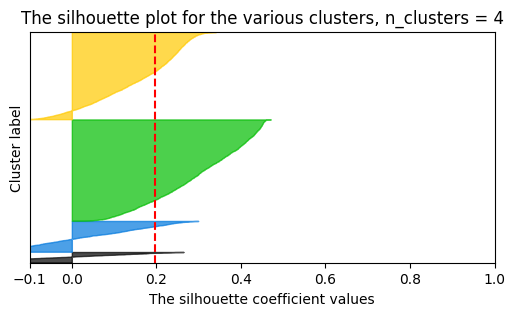

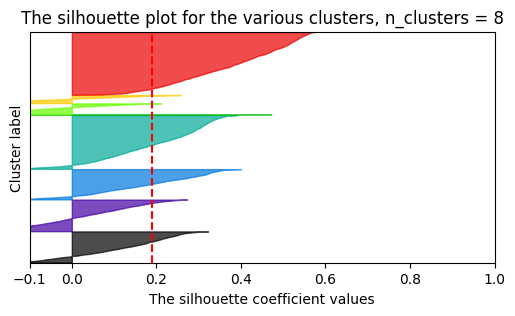

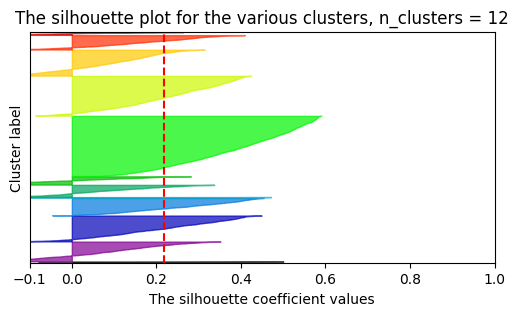

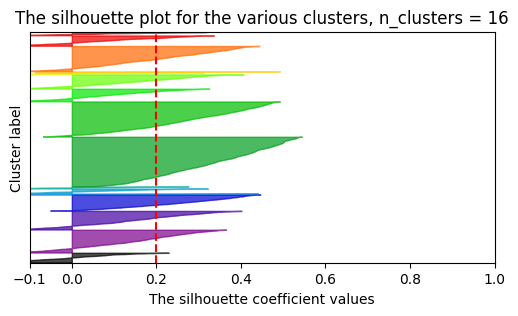

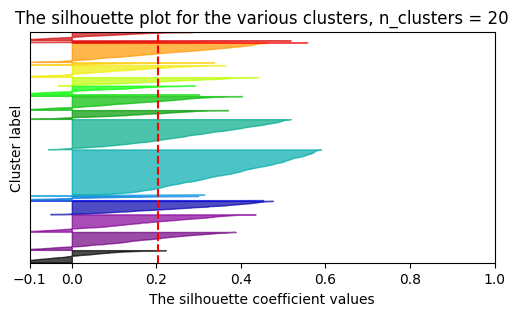

In [59]:
plot_silhouette(X_standardized, kmin=4, kmax=21, step=4)

12 clusters result in a better silhouette score

# 5. Hierarchical clustering

What is hieararchical clustering?


Hierarchical clustering is a technique that groups similar data into clusters using a tree-like structure known as a dendrogram.

# 6. Run hierarchical clustering

with different types of linkage looking for 8-12 clusters (choose one number):
 - "single"
 - "complete"
 - "ward"
 - "average"
 
For each type of linkage print sizes of the resulting clusters. Which of the linkages result in a non-degenerative clustering?

**Degenerative** clustering is a clustering of data into N clusters with most of the data being in a small subset of clusters, and rest of the clusters containing 1-5-10 points each.


In [62]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
import collections

In [70]:
linkage_lst = ['single', 'complete', 'ward','average']
cluster = 10
for linkage in linkage_lst:
    print(f'cluster: {cluster}, linkpage: {linkage}')
    AC = AgglomerativeClustering(n_clusters = cluster, linkage = linkage)
    res = AC.fit_predict(X_standardized)
    counter = collections.Counter(res)
    print(counter)

cluster: 10, linkpage: single
Counter({0: 8627, 6: 1, 8: 1, 5: 1, 7: 1, 2: 1, 9: 1, 4: 1, 3: 1, 1: 1})
cluster: 10, linkpage: complete
Counter({1: 8525, 2: 36, 3: 27, 0: 20, 4: 16, 8: 7, 6: 2, 9: 1, 5: 1, 7: 1})
cluster: 10, linkpage: ward
Counter({7: 2627, 0: 1879, 6: 1040, 2: 998, 3: 852, 4: 679, 1: 414, 9: 105, 5: 23, 8: 19})
cluster: 10, linkpage: average
Counter({9: 8575, 1: 16, 3: 15, 0: 14, 8: 5, 2: 4, 4: 4, 5: 1, 7: 1, 6: 1})


# 7. Plot dendrogram

for Ward linkage from the previous question what distance treshold will result in 10 clusters?


In [60]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

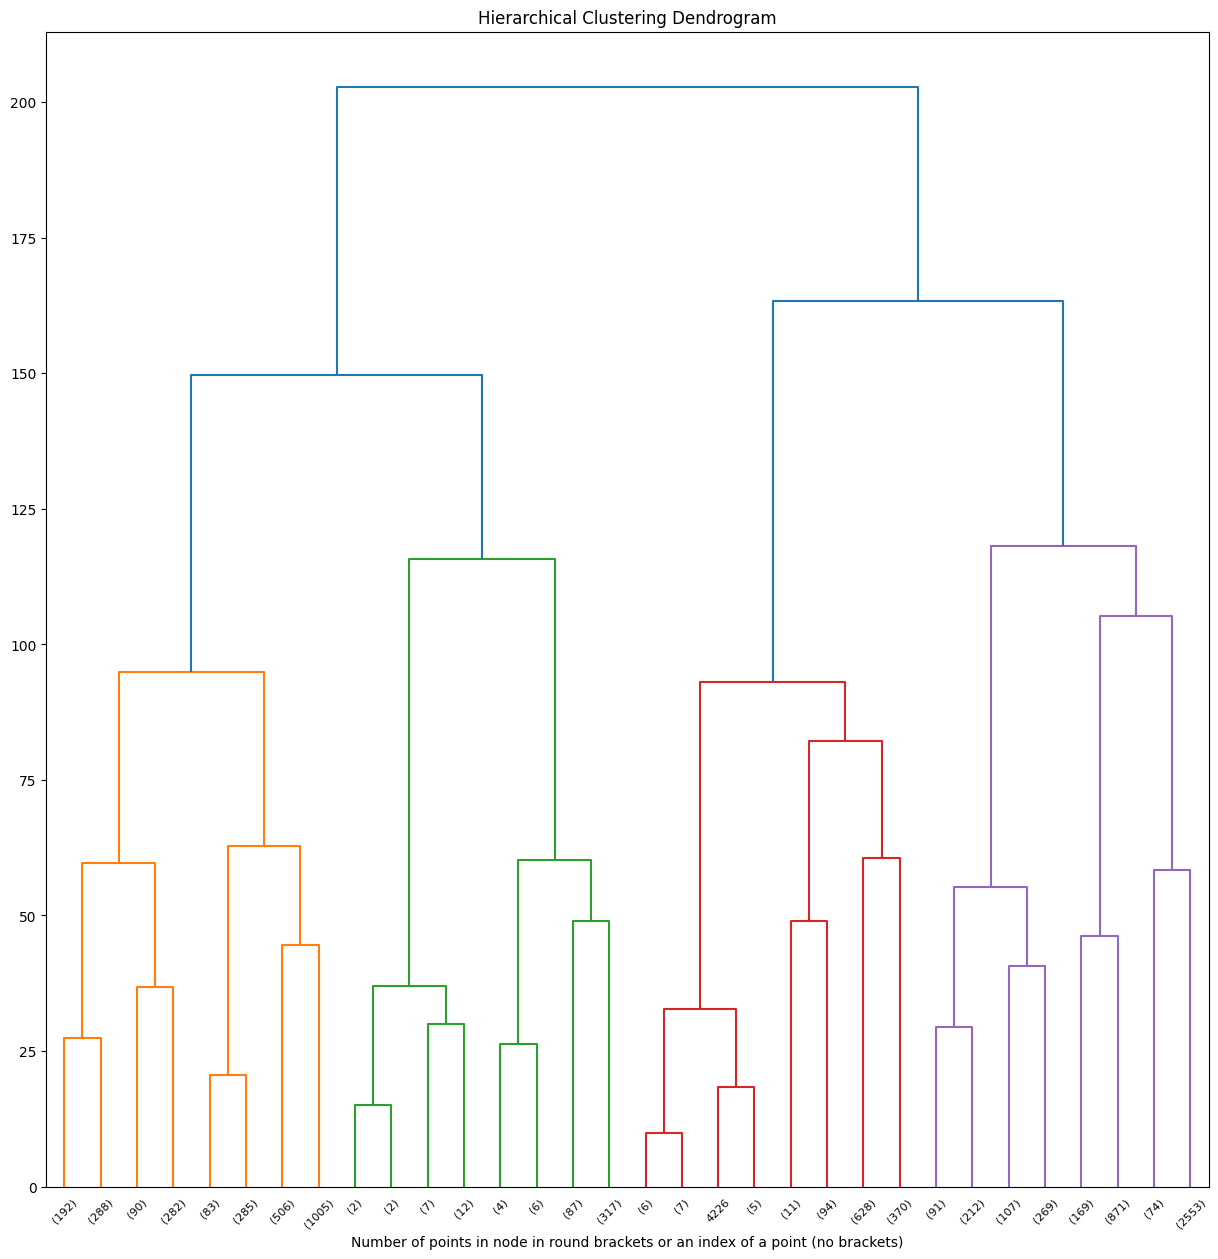

In [63]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X_standardized)

plt.figure(figsize=(15,15))
plt.title("Hierarchical Clustering Dendrogram") 
plot_dendrogram(model, truncate_mode="level", p=4)# plot the top three levels of the dendrogram
plt.xlabel("Number of points in node in round brackets or an index of a point (no brackets)")
plt.show()

# Visualization

To visualize our multi-dimensional data we will apply two different dimensionality techniques: PCA and tSNE ("tea-sni")

# 8. Select all true statements about PCA


Explained variance refers to the proportion of the dataset's total variance that is accounted for by each component.
PCA linearly combines the original features to construct new, principal components.
PCA is an unsupervised algorithm mainly used for dimensionality reduction in data.

# Run PCA with 2 components

Unlike kmeans and hierarchical clustering PCA only requires data centering (without data scaling)

In [71]:
X_mean = df - df.mean(axis=0)

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(2)
X_pca2 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.47493166 0.17814415]
0.6530758107116083


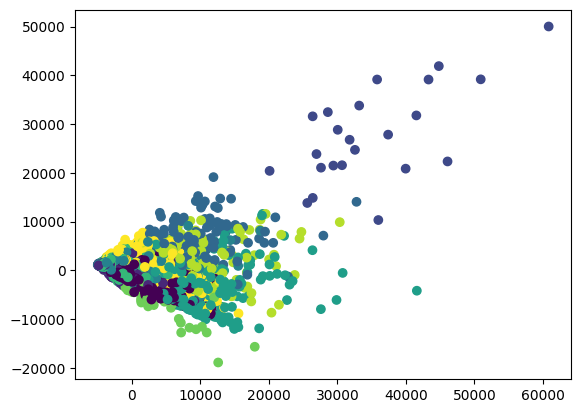

In [74]:
kmeans = KMeans(n_clusters=10, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels); # Use kmeans labels for the color

PCA visualizations are not always informative, we will try using TSNE, but first we need to select the optimal number of PCA components

# 9. Select number of PCA components

based on explained variance ratio. Which minimal number of PCA components explain **atleast 95%** of the data variance (`X_mean`)?


# These are the `loadings` of the very first Principle component, which explains about 47% of data variance


In [75]:
components = dict(zip(df.columns, pca.components_[0]))
components = sorted(components.items(), key=lambda x: x[1], reverse=True)

for c, w in components:
    print(c, np.round(w, 3))

CREDIT_LIMIT 0.687
PAYMENTS 0.488
PURCHASES 0.295
BALANCE 0.291
CASH_ADVANCE 0.217
ONEOFF_PURCHASES 0.213
MINIMUM_PAYMENTS 0.136
INSTALLMENTS_PURCHASES 0.082
PURCHASES_TRX 0.002
CASH_ADVANCE_TRX 0.0
TENURE 0.0
ONEOFF_PURCHASES_FREQUENCY 0.0
PURCHASES_FREQUENCY 0.0
CASH_ADVANCE_FREQUENCY 0.0
PURCHASES_INSTALLMENTS_FREQUENCY 0.0
BALANCE_FREQUENCY 0.0
PRC_FULL_PAYMENT 0.0


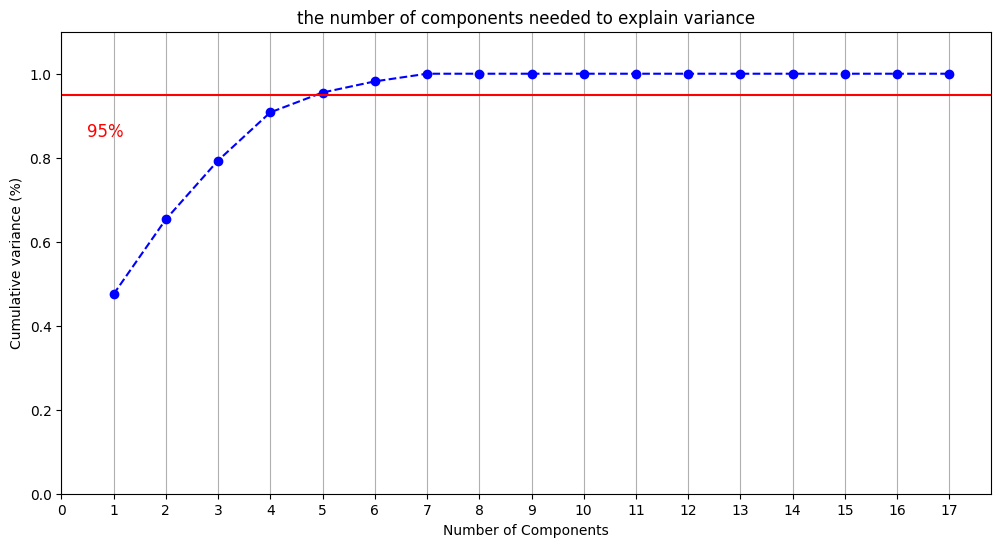

In [77]:
pca = PCA().fit(X_mean)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('the number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% ', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

5 components

# 10. Select all correct statements

based on the whole PCA analysis


# TSNE visualization

# 11. What is t-SNE?


t-SNE (t-Distributed Stochastic Neighbor Embedding) is a technique for dimensionality reduction that is particularly well-suited for the visualization of high-dimensional datasets.

In [82]:
 !pip install opentsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.0 MB/s eta 0:00:00


In [83]:
from openTSNE import TSNE
pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean)
embedding = TSNE().fit(X_pca10)

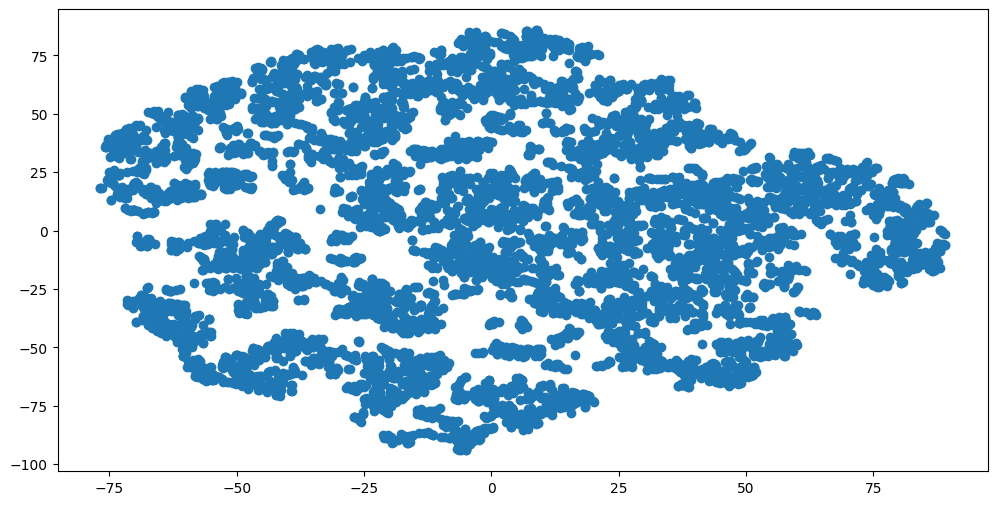

In [84]:
plt.scatter(embedding[:, 0], embedding[:, 1]);

In [85]:
ac = AgglomerativeClustering(n_clusters=8, linkage='ward')
prediction = ac.fit_predict(X_pca10)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2699,  863,  762,  996,   22, 1291, 1984,   19]))

### tSNE with AgglomerativeClustering labels

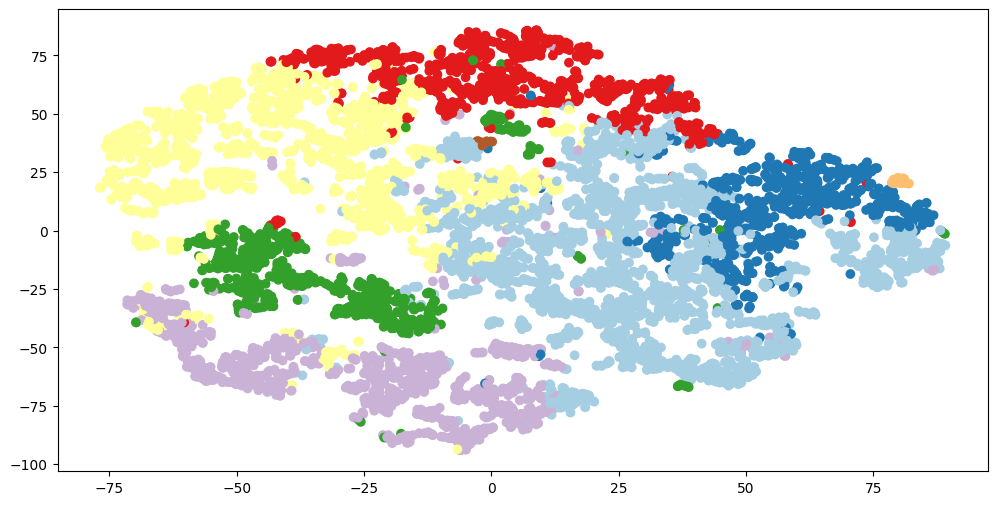

In [86]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=prediction, cmap='Paired');

### tSNE with KMeans clustering labels

In [87]:
kmeans = KMeans(n_clusters=8, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

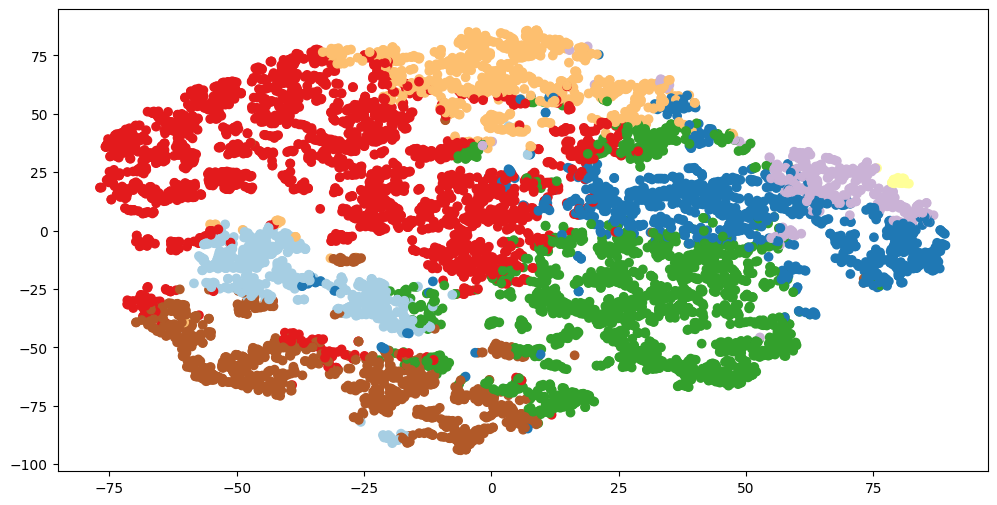

In [88]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired');

# 12. Which metrics are suitable for clusterings comparison?



- adjusted rand index
- adjusted mutual information
- normalized mutual information
- jaccard score

# 13. Compare Kmeans and Agglomerative clusterings

with 8 clusters using Adjusted Rand Score, what is the value of ARI?


In [91]:
from sklearn.metrics import adjusted_rand_score
kmeans = KMeans(n_clusters=8, n_init='auto')
labels_kmeans = kmeans.fit_predict(X_standardized)

AC = AgglomerativeClustering(n_clusters = 8, linkage = 'ward')
labels_AgglomerativeClustering = AC.fit_predict(X_standardized)

adjusted_rand_score(labels_kmeans, labels_AgglomerativeClustering)

0.6223211154123445

between 0.4 and 0.7

Visually KMeans and Agglomerative (with Ward distance) result in drastically different results, we will try to remove data outliers and see if it will affect the results

# Remove outliers

In [101]:
def detect_outliers_very_simple(x, col):
    """A naive outliers detector, based on left most (5 percentile) or right most (95 percentile) threshold"""
    if col in ['BALANCE_FREQUENCY', 'TENURE']:
        return x < x.quantile(0.05)
    else:
        return x > x.quantile(0.95)

In [102]:
cols_outliers = dict()
outliers = [False] * df.shape[0]

for col in columns:
    cols_outliers[col] = detect_outliers_very_simple(df[col], col)
    outliers += cols_outliers[col]
    print(col, np.round(cols_outliers[col].sum() / df.shape[0] * 100), '%')

BALANCE 5.0 %
BALANCE_FREQUENCY 4.0 %
PURCHASES 5.0 %
ONEOFF_PURCHASES 5.0 %
INSTALLMENTS_PURCHASES 5.0 %
CASH_ADVANCE 5.0 %
PURCHASES_FREQUENCY 0.0 %
ONEOFF_PURCHASES_FREQUENCY 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY 0.0 %
CASH_ADVANCE_FREQUENCY 4.0 %
CASH_ADVANCE_TRX 5.0 %
PURCHASES_TRX 5.0 %
CREDIT_LIMIT 4.0 %
PAYMENTS 5.0 %
MINIMUM_PAYMENTS 5.0 %
PRC_FULL_PAYMENT 0.0 %
TENURE 4.0 %


In [112]:
X_mean['is_outlier'] = outliers

# 14. What is the percentage of detected outliers (to the whole data)?


In [114]:
percent=(X_mean['is_outlier'].sum()/X_mean['is_outlier'].shape[0])*100

In [115]:
percent

31.88976377952756

32%

# 15. Repeat the analysis on filtered data

Run:
1. PCA with 10 components
2. KMeans with **12 clusters** (using PCA representation), set `n_init='auto'`
3. Hierarchical clustering with **12 clusters** (using PCA representation)
4. Compare 2 and 3 using adjusted mutual information

what is the value of AMI?


In [116]:
X_mean_filtered = X_mean.query('is_outlier==False')

In [117]:
from sklearn.metrics import adjusted_mutual_info_score

In [123]:
pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean_filtered)

kmeans = KMeans(n_clusters=12, n_init='auto')
kmeans_10 = kmeans.fit_predict(X_mean_filtered)

AC = AgglomerativeClustering(n_clusters = 12, linkage = 'ward')
Hierarchical_10 = AC.fit_predict(X_mean_filtered)
adjusted_mutual_info_score(kmeans_10, Hierarchical_10)

0.6438848867120401

between 0.5 and 0.8

# 16. Plot a subplot with points colored according to kmeans and agglomerative clustering

Draw a 1 row 2 columns subplot using TSNE embeddings. Title each subplot according to the source of clusters' colors (kmeans or agglomerative). Save pdf and upload it to the submission form.

In [121]:
embedding = TSNE().fit(X_pca10)

In [124]:
pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean_filtered)

kmeans = KMeans(n_clusters=10, n_init='auto')
prediction_kmeans = kmeans.fit_predict(X_mean_filtered)

AC = AgglomerativeClustering(n_clusters = 10, linkage = 'ward')
prediction = AC.fit_predict(X_mean_filtered)

# Plotly visualization

> ChatGPT: `How to plot an interactive scatter plot in python so I can mouse over a point to see some label, provide a code example.`

> `What if my data source is stored in pandas DataFrame?`

> `How to add a color to each point?`

finalize with some manual edits (change title, add color alpha, etc.)

## Try to mouse over the points on the graph

In [125]:
x_plot = pd.DataFrame(index=X_mean_filtered.index)
x_plot['tsne1'] = embedding[:, 0]
x_plot['tsne2'] = embedding[:, 1]
x_plot['customer_id'] = range(embedding.shape[0])
x_plot['cluster_agg'] = prediction
x_plot['cluster_kmeans'] = prediction_kmeans
x_plot = x_plot.reset_index()

In [126]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [140]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Agglomerative Clustering", "K-means"))
fig.add_trace(go.Scatter(x=x_plot['tsne1'], y=x_plot['tsne2'],mode='markers',marker=dict(color=x_plot.cluster_agg)),row=1, col=1)
fig.add_trace(go.Scatter(x=x_plot['tsne1'], y=x_plot['tsne2'],mode='markers',marker=dict(color=x_plot.cluster_kmeans)),row=1,col=2)
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)), selector=dict(mode='markers'))
fig.update_layout(title='TSNE plot of customers clusters', xaxis_title='x', yaxis_title='y')
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.show()

# 17. Interpret the resulting clusters

Try to interpret the resulting clusters, you can use smaller number of clusters (e.g. 4-8) and any clustering algorithm you want. Provide a short but detailed report <300 words. Save it to pdf and upload to submission form.